<img src="https://raw.githubusercontent.com/hwhitt/DSGT-Workshop-Content/master/images/logo.png" width="100"/>

# DSGT Bootcamp Week 4: Modeling with Machine Learning

## Learning Objectives 
- What is a Machine Learning Model?
- Classification vs. Regression
- Survey of models (eg: Decision Tree/Random Forest, Logistic Regression, Neural Networks, SVM)
- Evaluate performance of Machine Learning model (eg: metrics like precision, accuracy, recall, mean square error, etc)


In [1]:
%ls

requirements.txt  titanic_train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # filtering out messy warning messages
warnings.filterwarnings("ignore")

In [3]:
# Read data
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing
- Remove columns and rows with a lot of missing values
- Remove irrelevant columns like **PassengerId, Name, Ticket**
- Create dummy variables for categorical features like **Sex, Embarked**

In [4]:
def clean(df):

  # remove columns and rows with a lot of missing values
  df = df.drop(columns = ['Cabin'])
  df = df.dropna(axis=0,how = 'any')

  # remove irrelevant columns
  df = df.drop(columns = ['PassengerId', 'Name', 'Ticket']).reset_index(drop = True)
  return df

In [5]:
df = clean(df)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


In [6]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
707,1,0
708,0,1
709,1,0
710,0,1


In [7]:
df = pd.concat([df, pd.get_dummies(df['Sex'])], axis = 1).drop(columns = ['Sex'])
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
707,0,3,39.0,0,5,29.1250,Q,1,0
708,0,2,27.0,0,0,13.0000,S,0,1
709,1,1,19.0,0,0,30.0000,S,1,0
710,1,1,26.0,0,0,30.0000,C,0,1


In [8]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
707,0,1,0
708,0,0,1
709,0,0,1
710,1,0,0


In [9]:
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis = 1).drop(columns = ['Embarked'])
df

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,39.0,0,5,29.1250,1,0,0,1,0
708,0,2,27.0,0,0,13.0000,0,1,0,0,1
709,1,1,19.0,0,0,30.0000,1,0,0,0,1
710,1,1,26.0,0,0,30.0000,0,1,1,0,0


## Train Test Splitting
- All the data is splitted into two parts, **training set** and **testing set**. 
- One works as the learning material for us to train the model, and the other works as the final exam for us to test how good our model is after the training.

**Question:** How should we split the data into training set and testing set?

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Survived'])
y = df['Survived']

# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

print('Training set shape: ', X_train.shape)
print('Testing set shape: ', X_test.shape)

Training set shape:  (569, 10)
Testing set shape:  (143, 10)


In [11]:
y_train

143    0
600    1
98     1
631    0
540    0
      ..
390    0
311    1
152    1
89     0
151    0
Name: Survived, Length: 569, dtype: int64

In [12]:
# Standard Scale the data such that each column has mean 0 and variance 1
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  

# apply same transformation to test data
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[ 0.91237159,  0.42086544, -0.55711037, ..., -0.46734935,
        -0.19575793,  0.52515212],
       [-0.28934006,  1.24875451,  0.60404641, ..., -0.46734935,
        -0.19575793,  0.52515212],
       [ 0.91237159, -1.23491271,  0.60404641, ...,  2.13972694,
        -0.19575793, -1.90421014],
       ...,
       [ 0.91237159, -0.75197742,  0.60404641, ..., -0.46734935,
        -0.19575793,  0.52515212],
       [ 0.91237159, -0.6139959 , -0.55711037, ..., -0.46734935,
        -0.19575793,  0.52515212],
       [-0.28934006, -0.75197742, -0.55711037, ..., -0.46734935,
        -0.19575793,  0.52515212]])

In [14]:
X_train.shape

(569, 10)

## Dimension Reduction: projecting data to a 2D plane

**Question**: Why do you think dimension reduction is important?

**PCA**: a statistical method to project data in a higher dimensional space into a lower dimensional space by maximizing the variance of each dimension.

<img src="https://miro.medium.com/max/231/0*Jo1VWpTi6u6llQW9"  height='400'>

In [15]:
y_train

143    0
600    1
98     1
631    0
540    0
      ..
390    0
311    1
152    1
89     0
151    0
Name: Survived, Length: 569, dtype: int64

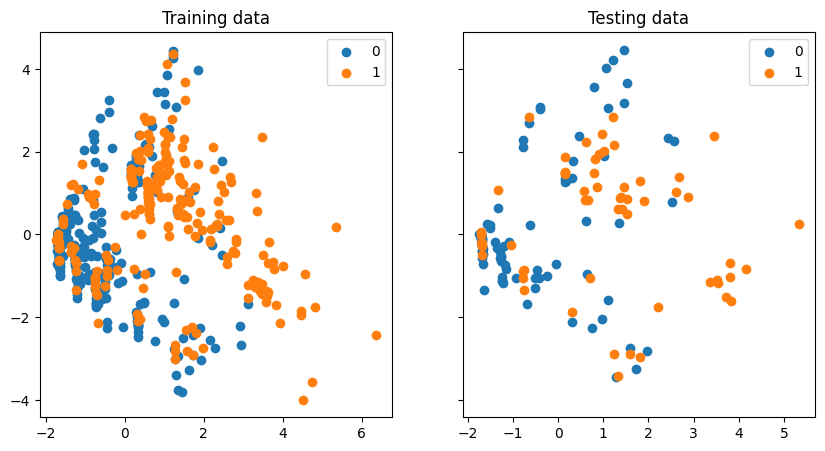

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_train)
X_train2D = pca.transform(X_train)
X_test2D = pca.transform(X_test)

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10, 5))
for i in range(2):
      axarr[0].scatter(X_train2D[y_train == i, 0], X_train2D[y_train == i, 1], label = str(i))
                                    
      axarr[0].legend()
      axarr[0].set_title('Training data')

      axarr[1].scatter(X_test2D[y_test == i, 0], X_test2D[y_test == i, 1], label = str(i))
                                    
      axarr[1].legend()
      axarr[1].set_title('Testing data')

**Question:** what do you think is the best way to classify the training data?

## What is a Machine Learning Model?
A matchine learning model can be a mathematical representation of a real-world process. To generate a machine learning model you will need to provide training data to a machine learning algorithm to learn from.

## Classification vs. Regression
- **Classification algorithms** are used to predict/Classify the discrete values such as Male or Female, True or False, Spam or Not Spam, etc.
  - Logistic Regression
  - Decision Tree Classification
  - Random Forest Classification
  - Support Vector Machines
  - Kernel SVM
  - K-Nearest Neighbours
  - Naïve Bayes
  - Neural Network Classification

- **Regression algorithms** are used to predict the continuous values such as price, salary, age, etc.
  - Simple Linear Regression
  - Multiple Linear Regression
  - Polynomial Regression
  - Support Vector Regression
  - Decision Tree Regression
  - Random Forest Regression
  - Neural Network Regression

**Question**: which kind of algorithms should we use to predict if a person survided or not?

## Survey of models

### Decision Tree/Random Forest

A tree like model that optimizes probable outcomes based off existing statistics. The node that goes to the left from the previous node abides to the set condition where as the one going to the right is negative.





#### Gini Impurtiy/ Calculating Gini Impurity

A very important concept to understand is Gini Impurity. Gini impurity is the probability of incorrectly labeling something. The metric helps us determine which node would be most suitable.

If a set has one class of points the **purity is high** and the **gini number is small**. If a set has equal data from two classes the **purity is low** and the **gini number is high**. In a decision tree we are trying to **minimize the gini number**.

--> How to calculate: P<sub>yes</sub> * (1 - P<sub>yes</sub>) + P<sub>no</sub> * (1 - P<sub>no</sub>) = P<sub>yes</sub> - P<sub>yes</sub><sup>2</sup> + P<sub>no</sub> - P<sub>no</sub><sup>2</sup> 

**1 - (P<sub>yes</sub>)<sup>2</sup> - (P<sub>no</sub>)<sup>2</sup>**

(The value must then be properly weighted)


EXAMPLE:

--> let's use strictly gender to find Gini impurity. Our metric for our first node will be whether or not the passenger is a woman

Out of 259 women, 195 survive and 64 die.

Out of 453 men, 93 survive and 360 die.

Looking at women passengers, 1 - (195 / 259)<sup>2</sup> - (64 / 259)<sup>2</sup> = .372

Looking at male passengers, 1 - (93 / 453)<sup>2</sup> - (360 / 453)<sup>2</sup> = .326

We end up with values of .372 and .334. However, we are not done as .372 accounts for a smaller portion of the population than .334 does (women to men). Therefore, we now must weight these properly

women gini: .372 * (259 / 712) = .135 *(0.135 chance of misclassifying a female)*

men gini: .326 * (453 / 712) = .207 *(0.207 chance of misclassifying a male)*

These gini numbers indicate that knowing if our passenger is a woman, we have a higher probability of predicting her survival

### How to Further Use Gini Impurity

Let's say we look at the node produced by the node of passengers who are women. We can now decide whether or not we want to add a node or not, but how do we decide whether or not to add more?

We have already used gender as our first condition. We can now look at any other factor (i.e. priority class or fare price or age). Since fare price and age do not have distinct groups, we must give them their own groups ie ages between 25 through 50 as a group.

Let's start with priority class since this already has groups. We have priority classes of 1, 2 and 3. We calculate the gini impurity for each of those classes, for women in priority classes of 1, 2, 3. If any of those gini impurities are lower than the current one, we will keep the node. If not, we remove the node as that would only hurt predictability since a lower gini indicidates higher accuracy.

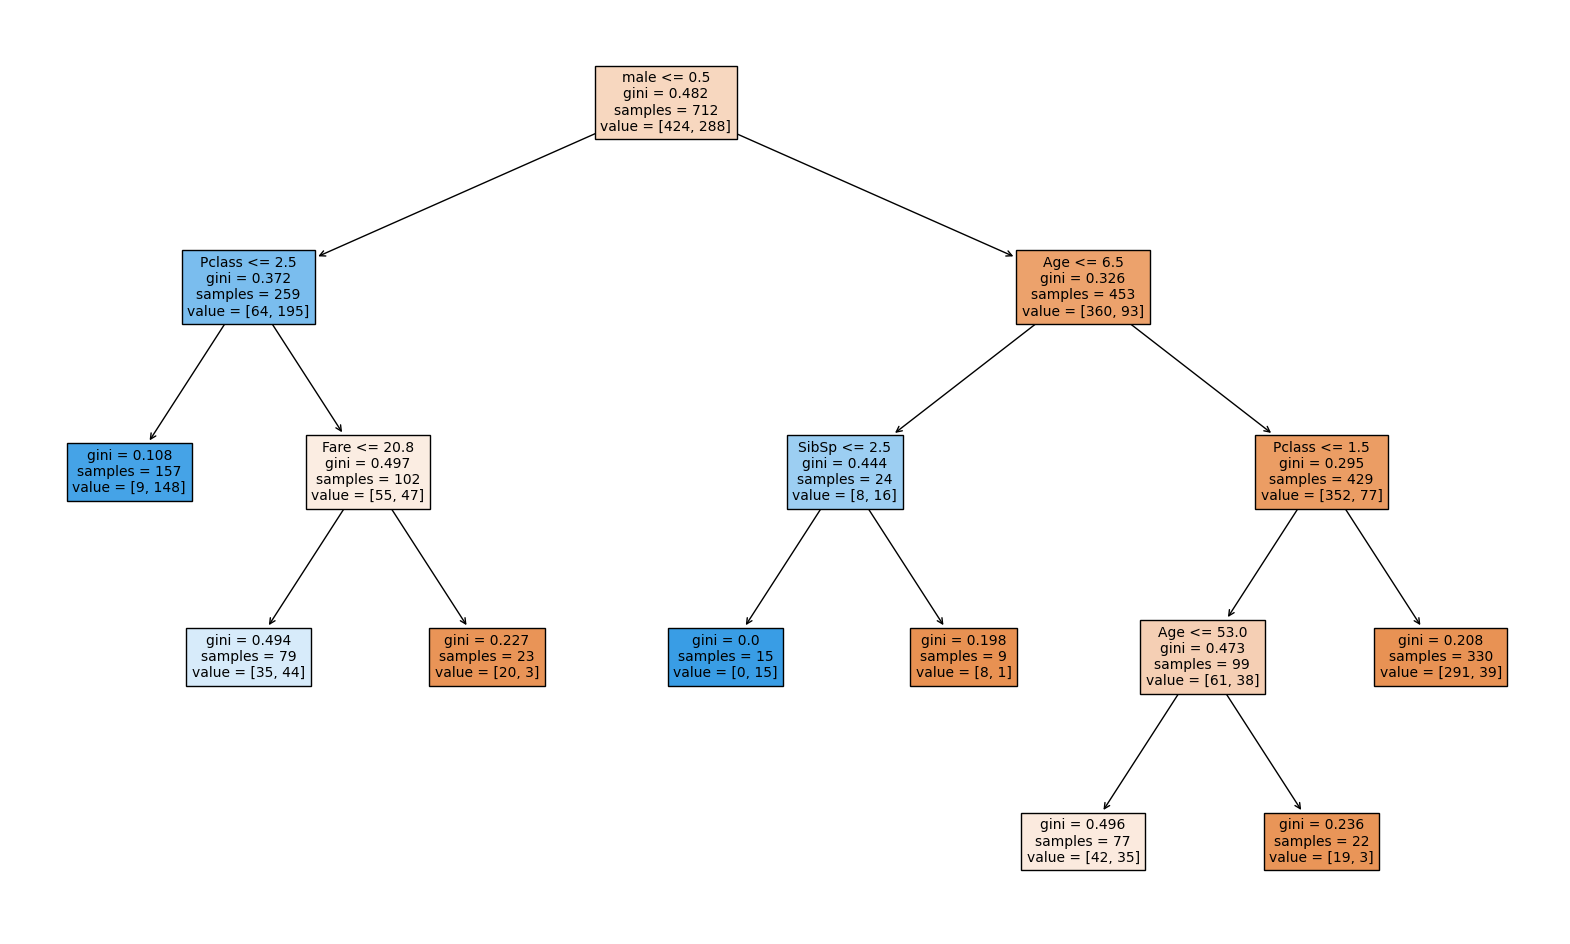

In [17]:
from sklearn import tree

# decision tree classifier
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes = 8) #limits amount of leafs nodes
clf_tree.fit(X, y)  #fitting to the data
#clf_tree.fit(X_train, y_train) 

plt.figure(figsize = (20, 12))
tree.plot_tree(clf_tree,filled = True,fontsize=10,feature_names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S'])
plt.show()

### Logistic Regression

Let's first recap a linear regression model. 

Linear approach to modeling relationship between a dependent variable and multiple or a single input variable, ie using height to predict weight or using height and shoe size to predict weight.

Logistic regression follows the same concept except uses discrete values ie yes and no rather than continuous values.

Linear regression would be using height to predict weight, and logistic regression would be using height to predict whether or not someone is above 150 pounds based on their height.





In [18]:
from sklearn.linear_model import LogisticRegression


In [19]:
#fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

### Neural Networks
- Can learn any function and build super complicated models from a large amount of data
- Playground: https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises


In [22]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3, 5), random_state=5)

nn.fit(X_train, y_train)

print('Training accuracy: ', nn.score(X_train, y_train))
print('Testing accuracy: ', nn.score(X_test, y_test))

Training accuracy:  0.8383128295254832
Testing accuracy:  0.7552447552447552


**Question:** Here we used 3 hidden layers and each layer with 3 neurons. If we add more hidden layers or more neurons, will the model become simpler or more complicated? Is this always true?

### Linear SVM (Support Vector Machine) vs. Kernel SVM





- **Linear SVM**: linear decision boundary

- **Kernel SVM**: nonlinear decision boundary

An linear SVM classifier has a linear decision boundary with the maximum margin if the classes are linearly separable. 


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/1280px-Svm_separating_hyperplanes_%28SVG%29.svg.png"  height='400'>

A kernel SVM uses a nonlinear function, which is called **kernel function**, to find a nonlinear decision boundary with the maximum margin.

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/2560px-Kernel_Machine.svg.png">

**Question**: which model will have a better performance on our data set?

In [23]:
from sklearn.svm import SVC

SVM=SVC(kernel = 'linear')
SVM.fit(X_train,y_train)

print('Training accuracy of SVM: ', SVM.score(X_train, y_train))
print('Testing accuracy of SVM: ', SVM.score(X_test, y_test))

Training accuracy of SVM:  0.7908611599297012
Testing accuracy of SVM:  0.7342657342657343


In [24]:
SVC_rbf=SVC(kernel="rbf")
SVC_rbf.fit(X_train,y_train)

print('Training accuracy of Kernel SVM: ', SVC_rbf.score(X_train, y_train))
print('Testing accuracy of Kernel SVM: ', SVC_rbf.score(X_test, y_test))

Training accuracy of Kernel SVM:  0.8506151142355008
Testing accuracy of Kernel SVM:  0.8041958041958042


In [25]:
SVM.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

## Results visualization

In [26]:
#@title
def plot_boundary(X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
    f, axarr = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(25, 5))

    for idx, clf, tt in zip([0, 1, 2, 3, 4], list(models.values()), list(models.keys())):
        # print(idx)
        clf.fit(X,y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx].contourf(xx, yy, Z, alpha=0.4)
        for i in range(2):
            axarr[idx].scatter(X[y == i, 0], X[y== i, 1], label = str(i))
                                      
        axarr[idx].legend()
        axarr[idx].set_title(tt)
    
    plt.show()

In [27]:
#@title
models = {'Decision Tree': clf_tree, 'Logistic Regression': logmodel, 'Neural Network': nn, 'SVM': SVM, 'Kernel SVM': SVC_rbf}

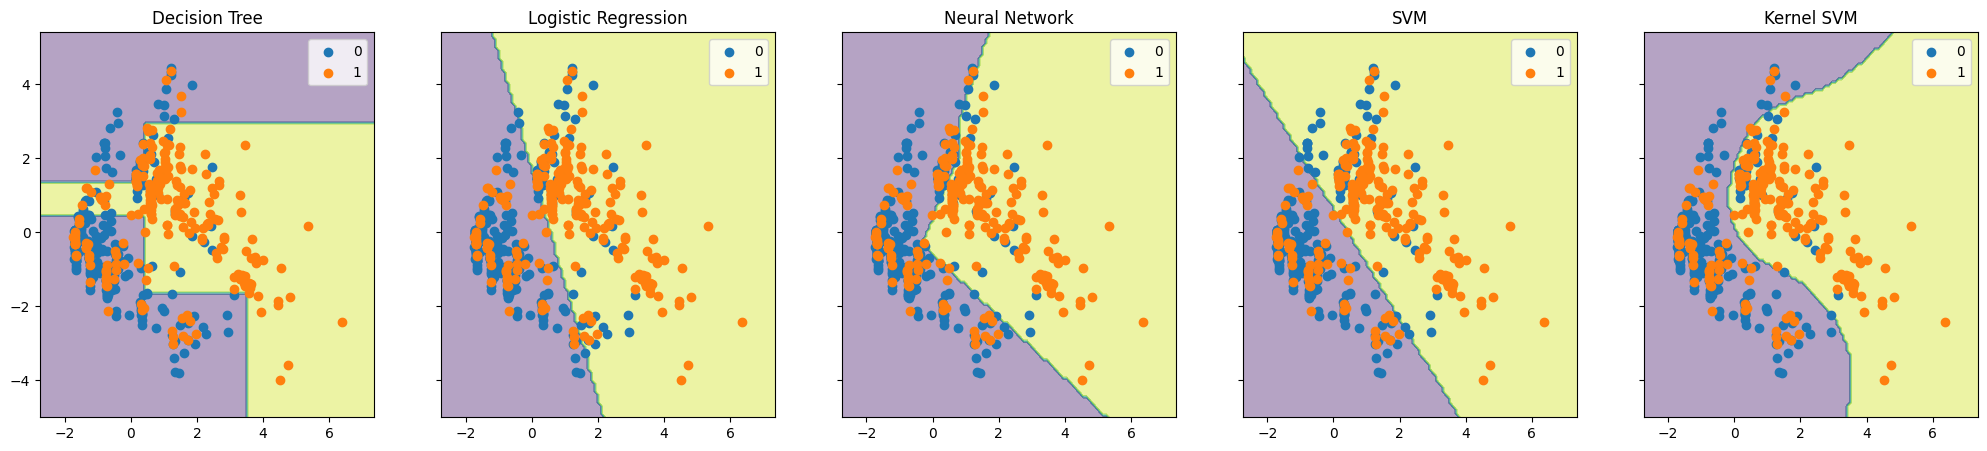

In [28]:
plot_boundary(X_train2D, y_train)

**Question:** which model do you think work the best for our dataset?

## Evaluate performance of Machine Learning models
### Metrics:
- For regression:
  - mean squared error
  - R squared

- For classification:
  - accuracy
  - precision
  - recall
  - confusion matrix

Accuracy is **not** a good metric when we have **imbalanced dataset** where the classes are not represented equally. 

**Questions**: 
- From the plots below, is our dataset imbalanced?
- Why is accuracy not a good metric for imbalanced datasets?

### Imbalanced Dataset Example

<AxesSubplot: xlabel='imbalanced', ylabel='count'>

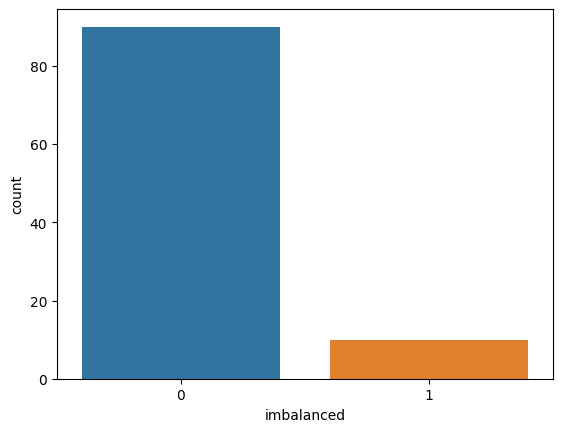

In [29]:
# 90 percent are labeled as 0
# 10 percent are labeled as 1
y_imbalanced = pd.DataFrame(np.array([1]*10 + [0]*90),columns = ['imbalanced'])

sns.countplot(x = 'imbalanced', data = y_imbalanced)

**Questions:** 
- Can we have this kind of imbalanced data in reality? If yes, provide an example.

- Can you come up with a simple model that will have a very high accuracy?

In [30]:
# simply predict 0 for all the data
y_pred = np.array([0]*100)

from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_imbalanced, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100



**Question:** Does the evaluation table above tell us that simply making 0 predictions for all data is not good? How did you find it?

### Titanic Dataset

Text(0.5, 1.0, 'Survived')

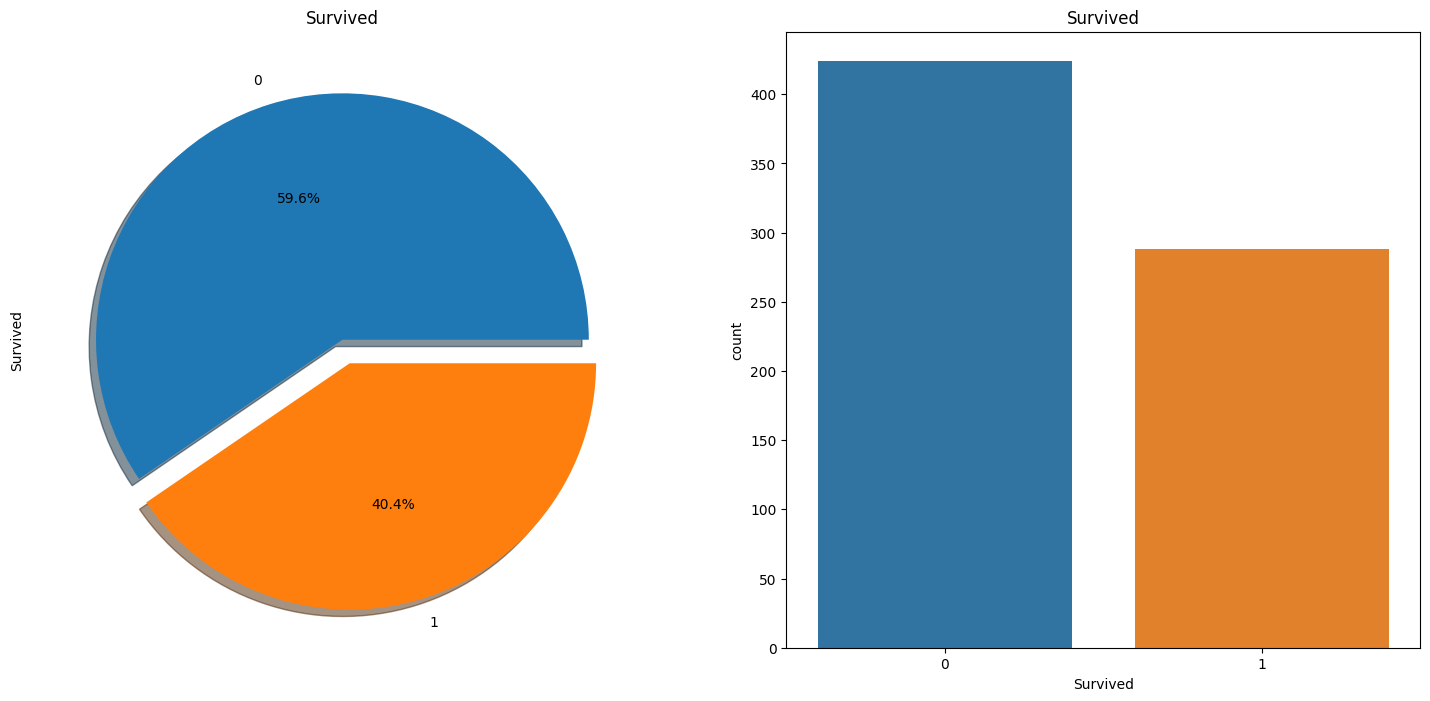

In [31]:
f, ax = plt.subplots(1,2,figsize = (18,8))
df['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')

sns.countplot(x = 'Survived', data = df, ax = ax[1])
ax[1].set_title('Survived')

Text(0.5, 1.0, 'Neural Network confusion matrix')

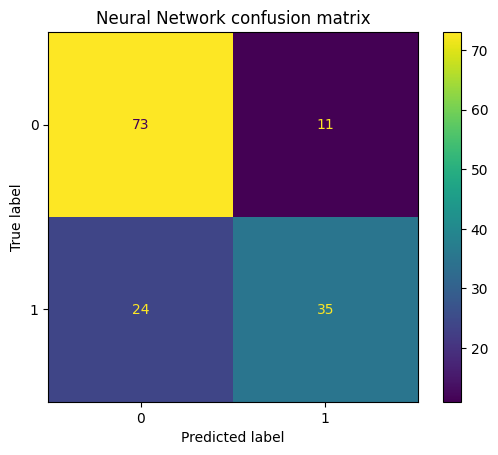

In [32]:
nn.fit(X_train, y_train) # fit our nueral network model using the traning data
plot_confusion_matrix(nn, X_test, y_test)
plt.title('Neural Network confusion matrix')

**Exercise:** use the confusion matrix above to find the accuracy, precision, and recall for our neural network model.

TP: True Positive

TN: True Negative

FP: False Positive

FN: False Negative

- **Accuracy**: what proportion of labels are correctly predicted? (Correctly predicted out of total)

        Formula = (TP + TN) / (TP + TN + FP + FN)

- **Precision**: what proportion of labels that are predicted as 1 are actually labeled as 1? (Correctly predicted positives out of total predicted positives)

        Formula = TP / (TP + FP)

  (Useful when cost of FP is high)


- **Recall**: what proportion of labels that are actually labeled as 1 are correctly predicted as 1? (Correctly predicted positives out of total positives)

        Formula = TP / (TP + FN)

  (Useful when cost of FN is high)



In [33]:
#print(classification_report(y_test, nn.predict(X_test)))

## Evaluation of our Classifers on Titanic Dataset

Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        84
           1       0.77      0.68      0.72        59

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143

*****************************************************
Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        84
           1       0.72      0.73      0.72        59

    accuracy                           0.77       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143

*****************************************************
Neural Network:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        84
           1       0.76      0.59      0.67        59

    accuracy          

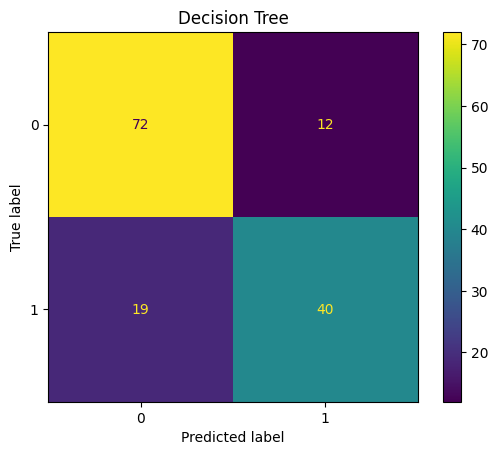

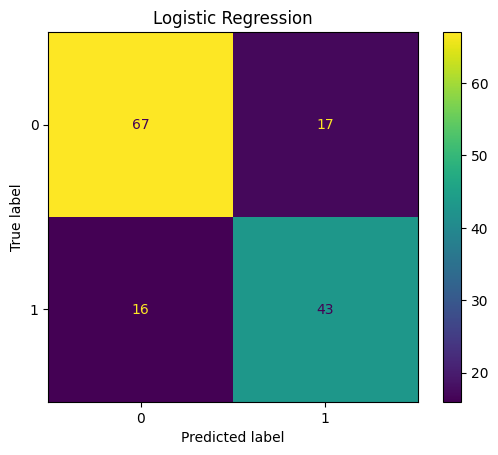

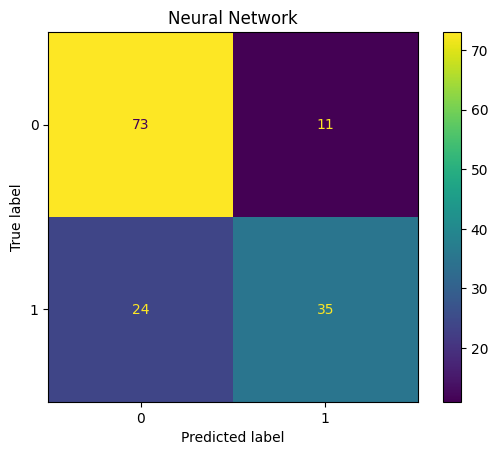

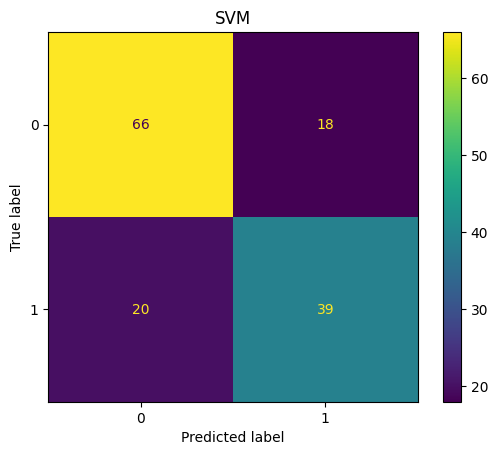

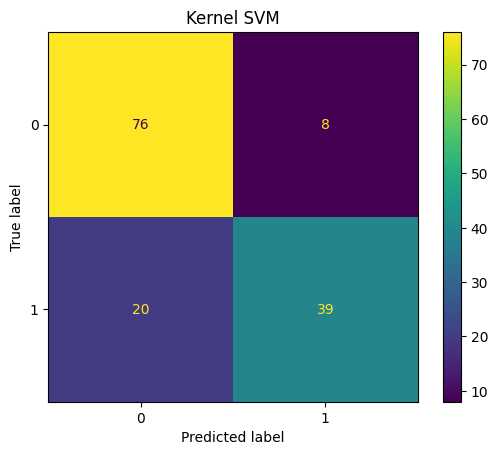

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
# from plot_confusion_matrix import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
predicts = {}
for model_name in models:
    # print(model_name)
    model = models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicts[model_name] = y_pred
    print(model_name + ':')
    print(classification_report(y_test, y_pred))
    # print('confusion matrix: ')
    # print(confusion_matrix(y_test,y_pred))
    print('*****************************************************')
    plot_confusion_matrix(model, X_test, y_test)
    plt.title(model_name)

Recap:

- 1) What Machine Learning classifers have we discussed today?

- 2) What metrics did we use to evaluate the ML classifers?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a3de591-578d-4c87-932a-8ff030c19cf7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>